In [6]:
#use Lasso to select features
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# get the all file name under the folder
import os
import time
path = '/Users/jeremyg/Documents/GitHub/SummerIndependentProject/tickData/factors_data/'

In [7]:
# calculate the correlation matrix and heat map
data = pd.read_csv(path + 'JBF_factors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2020-07-02':]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
spread,1.000000,0.942532,0.849349,0.711100,0.509026,0.467433,0.226826,0.407969,0.963170,0.888975,0.791937,0.068915,0.144361,-0.008030,0.011729,-0.026092,-0.216343
MA_5,0.942532,1.000000,0.920543,0.767295,0.493432,0.511325,0.087314,0.222133,0.995586,0.955043,0.854019,0.047940,0.151229,0.002822,0.007749,-0.028417,-0.088361
MA_20,0.849349,0.920543,1.000000,0.875544,0.187875,0.319040,-0.249944,0.020982,0.924821,0.991709,0.944626,0.009166,0.160446,0.020432,0.003694,-0.016615,-0.049273
MA_60,0.711100,0.767295,0.875544,1.000000,-0.149894,-0.111072,-0.127339,-0.090183,0.773088,0.883423,0.979570,0.004610,0.180860,0.016205,0.009560,0.005278,-0.028167
MACD,0.509026,0.493432,0.187875,-0.149894,1.000000,0.919282,0.443350,0.525813,0.486769,0.248399,-0.012537,0.098309,-0.002208,-0.030676,0.001242,-0.047123,-0.119943
MACDsignal,0.467433,0.511325,0.319040,-0.111072,0.919282,1.000000,0.054761,0.348492,0.500323,0.339755,0.053112,0.066149,-0.003586,-0.012128,-0.006264,-0.047304,-0.057588
MACDhist,0.226826,0.087314,-0.249944,-0.127339,0.443350,0.054761,1.000000,0.540280,0.095465,-0.143579,-0.152785,0.098751,0.002565,-0.050200,0.017415,-0.011819,-0.173130
RSI,0.407969,0.222133,0.020982,-0.090183,0.525813,0.348492,0.540280,1.000000,0.253003,0.070139,-0.044787,0.192508,-0.007493,-0.071484,0.014598,-0.037439,-0.297665
EMA_5,0.963170,0.995586,0.924821,0.773088,0.486769,0.500323,0.095465,0.253003,1.000000,0.958165,0.859181,0.051193,0.152609,0.001745,0.008267,-0.027932,-0.111192
EMA_20,0.888975,0.955043,0.991709,0.883423,0.248399,0.339755,-0.143579,0.070139,0.958165,1.000000,0.950334,0.018864,0.164468,0.016188,0.005880,-0.018289,-0.061303


In [8]:
data

,spread,MA_5,MA_20,MA_60,MACD,MACDsignal,MACDhist,RSI,EMA_5,EMA_20,EMA_60,time_to_end,midQuote,volume,Stock_Ask_Bid_Price_Depth_Ratio,Stock_Ask_Bid_Total_Volume_Ratio,delta_1
2020-07-02 09:05:00,-1.562476e-04,-0.002172,-0.002868,NaN,-0.000212,-0.000528,0.000315,58.241289,-0.001818,-0.002275,NaN,0.981132,10.152421,128.935028,0.998729,1.543403,1.452875e-03
2020-07-02 09:06:00,1.296628e-03,-0.001325,-0.002608,NaN,0.000091,-0.000404,0.000495,62.882708,-0.000780,-0.001935,NaN,0.977358,10.159875,2782.500000,1.000000,0.606614,-3.065287e-03
2020-07-02 09:10:00,-1.768659e-03,-0.000996,-0.002526,NaN,0.000083,-0.000306,0.000390,50.204129,-0.001109,-0.001919,NaN,0.962264,10.157587,393.653097,1.003274,1.797249,2.080822e-03
2020-07-02 09:15:00,3.121627e-04,-0.000593,-0.002334,NaN,0.000242,-0.000197,0.000439,56.600999,-0.000635,-0.001707,NaN,0.943396,10.167238,877.198167,0.998396,5.532679,-8.860531e-04
2020-07-02 09:20:00,-5.738904e-04,-0.000178,-0.002195,NaN,0.000293,-0.000099,0.000392,53.452171,-0.000615,-0.001599,NaN,0.924528,10.167476,1208.169355,1.000000,4.820798,8.683599e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 13:05:00,-9.143132e-04,-0.000579,-0.000300,-0.000650,0.000020,0.000151,-0.000132,48.108388,-0.000769,-0.000505,-0.000606,0.075472,11.589045,4768.773913,1.000000,0.901234,1.278235e-03
2023-03-31 13:10:00,3.639219e-04,-0.000515,-0.000287,-0.000644,0.000088,0.000139,-0.000051,53.994446,-0.000391,-0.000423,-0.000574,0.056604,11.588460,4851.370546,1.000000,0.942400,-3.639219e-04
2023-03-31 13:15:00,-1.776357e-15,-0.000515,-0.000187,-0.000644,0.000112,0.000133,-0.000022,52.179720,-0.000261,-0.000382,-0.000556,0.037736,11.587569,4898.781726,1.000000,0.989568,1.776357e-15
2023-03-31 13:20:00,0.000000e+00,-0.000515,-0.000159,-0.000644,0.000129,0.000132,-0.000004,52.179720,-0.000174,-0.000346,-0.000537,0.018868,11.587569,4923.114537,1.000000,0.970508,-1.711526e-04


In [9]:
# according to the correlation matrix, we can see that the spread is highly correlated with delta_1
list = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']

In [10]:
def valid_date_n_days_later(start, all_data, n):
    i = 1
    while i <= n:
        start = start + pd.DateOffset(days=1)
        if start in all_data.index:
            i = i + 1
        if start > all_data.index[-1]:
            break
    return start

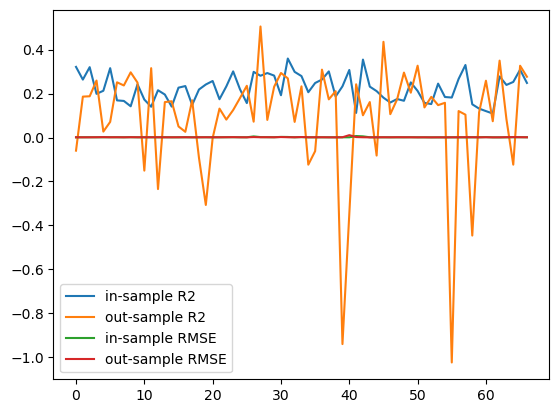

in-sample R2:  0.22510446984385565
out-sample R2:  0.09325716215440628
in-sample RMSE:  0.0014235393837123082
out-sample RMSE:  0.001412024362304512


In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# use sklearn to fit Lasso model
#split the data into train and test
all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 5)
    if train_date > data.index[-1]:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    end_date = valid_date_n_days_later(test_date, data, 1)


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # fit the OLS
    model_ols = LinearRegression()
    model_ols.fit(X_train, y_train)

    r2_in = model_ols.score(X_train, y_train)
    r2_out = model_ols.score(X_test, y_test)
    rmse_in = np.sqrt(np.mean((model_ols.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((model_ols.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)

    start_date = end_date

# plot the 4 lists in the same plot
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_in, label='in-sample RMSE')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("in-sample R2: ", sum(all_r2_in)/len(all_r2_in))
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("in-sample RMSE: ", sum(all_rmse_in)/len(all_rmse_in))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))

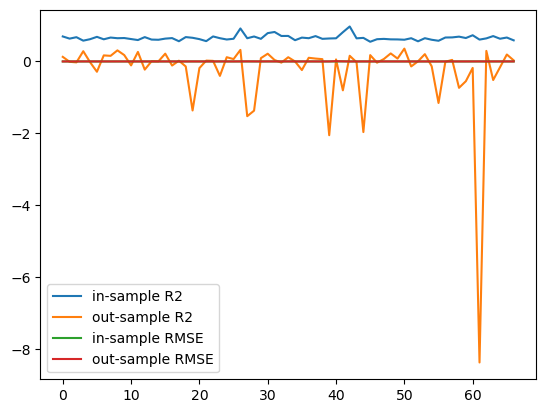

in-sample R2:  0.6572453323816243
out-sample R2:  -0.26797453593645315
in-sample RMSE:  0.0008649008824833454
out-sample RMSE:  0.0015644417022998194


In [19]:
# use adaBoost to fit the model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 5)
    if train_date > data.index[-1]:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    end_date = valid_date_n_days_later(test_date, data, 1)


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # fit the OLS
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)
    regr.fit(X_train, y_train)

    r2_in =  regr.score(X_train, y_train)
    r2_out = regr.score(X_test, y_test)
    rmse_in =  np.sqrt(np.mean((regr.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_in.append(r2_in)
    all_r2_out.append(r2_out)
    all_rmse_in.append(rmse_in)
    all_rmse_out.append(rmse_out)

    start_date = end_date

# plot the 4 lists in the same plot
plt.plot(all_r2_in, label='in-sample R2')
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_in, label='in-sample RMSE')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("in-sample R2: ", sum(all_r2_in)/len(all_r2_in))
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("in-sample RMSE: ", sum(all_rmse_in)/len(all_rmse_in))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 6
[LightGBM] [Info] Start training from score 0.000008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.13605e-06	valid_0's l1: 0.000882057
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.12522e-06	valid_0's l1: 0.000880664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.11616e-06	valid_0's l1: 0.000880481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.10868e-06	valid_0's l1: 0.000880812
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 9.03639e-07	valid_0's l1: 0.00068189
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.91888e-07	valid_0's l1: 0.00067546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.87423e-07	valid_0's l1: 0.000673817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.78166e-07	valid_0's l1: 0.000671973
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	valid_0's l2: 1.84019e-06	valid_0's l1: 0.00101836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	valid_0's l2: 1.83865e-06	valid_0's l1: 0.00101902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's l2: 1.82357e-06	valid_0's l1: 0.00101313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	valid_0's l2: 1.81463e-06	valid_0's l1: 0.00100889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	valid_0's l2: 1.81532e-06	valid_0's l1: 0.00100761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	valid_0's l2: 1.81184e-06	valid_0's l1: 0.00100473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[44]	valid_0's l2: 1.81385e-06	valid_0's l1: 0.00100445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[45]	val

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.95536e-06	valid_0's l1: 0.00108769
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.94489e-06	valid_0's l1: 0.00108255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.95001e-06	valid_0's l1: 0.0010797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.93353e-06	valid_0's l1: 0.00107516
[LightGBM] [Warning] No further splits with positive gain, 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 6
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.78184e-06	valid_0's l1: 0.00108901
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.72353e-06	valid_0's l1: 0.00107619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.67372e-06	valid_0's l1: 0.00106504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.63078e-06	valid_0's l1: 0.00105444
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.2643e-06	valid_0's l1: 0.000867978
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.24405e-06	valid_0's l1: 0.000864572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.22687e-06	valid_0's l1: 0.000861975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.20761e-06	valid_0's l1: 0.

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.37812e-06	valid_0's l1: 0.0012227
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.34949e-06	valid_0's l1: 0.00121621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.32907e-06	valid_0's l1: 0.00121282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.30693e-06	valid_0's l1: 0.00120777
[LightGBM] [Warning] No further splits with positive gain, 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 6
[LightGBM] [Info] Start training from score -0.000006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.24066e-06	valid_0's l1: 0.00102338
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.21585e-06	valid_0's l1: 0.00101878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.19323e-06	valid_0's l1: 0.00101479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.17965e-06	valid_0's l1: 0.00101336
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's l2: 1.4914e-06	valid_0's l1: 0.00083775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[19]	valid_0's l2: 1.48883e-06	valid_0's l1: 0.000837981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 1.48388e-06	valid_0's l1: 0.00083413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[21]	valid_0's l2: 1.49029e-06	valid_0's l1: 0.000832849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[22]	valid_0's l2: 1.48605e-06	valid_0's l1: 0.000828763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's l2: 1.48522e-06	valid_0's l1: 0.000825423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	valid_0's l2: 1.48132e-06	valid_0's l1: 0.000822542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[25]	valid_0's l2: 1.4827e-06	valid_0's l1: 0.000820317
[LightGBM] [Warning] No

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.39943e-06	valid_0's l1: 0.000948905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.39465e-06	valid_0's l1: 0.000946521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.39e-06	valid_0's l1: 0.000943847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 1.38605e-06	valid_0's l1: 0.000941385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 1.38114e-06	valid_0's l1: 0.000940602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[7]	valid_0's l2: 1.37872e-06	valid_0's l1: 0.000941292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[8]	valid_0's l2: 1.37395e-06	valid_0's l1: 0.000939791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[9]	valid_0

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[13]	valid_0's l2: 3.406e-06	valid_0's l1: 0.00131949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[14]	valid_0's l2: 3.38368e-06	valid_0's l1: 0.00131349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[15]	valid_0's l2: 3.37214e-06	valid_0's l1: 0.00131045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[16]	valid_0's l2: 3.35866e-06	valid_0's l1: 0.00130777
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[17]	valid_0's l2: 3.33347e-06	valid_0's l1: 0.00130406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[18]	valid_0's l2: 3.31334e-06	valid_0's l1: 0.00130081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[19]	valid_0's l2: 3.28388e-06	valid_0's l1: 0.00129519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.4327e-06	valid_0's l1: 0.00100702
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.40388e-06	valid_0's l1: 0.00099632
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.39566e-06	valid_0's l1: 0.000993244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.38102e-06	valid_0's l1: 0.000986222
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.34332e-06	valid_0's l1: 0.000906056
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.33138e-06	valid_0's l1: 0.000901212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.31657e-06	valid_0's l1: 0.000897122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.30618e-06	valid_0's l1: 0.000892756
[LightGBM] [Warning] No further splits with positive 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 6
[LightGBM] [Info] Start training from score -0.000012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.3733e-06	valid_0's l1: 0.000882153
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.36141e-06	valid_0's l1: 0.000875087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.34161e-06	valid_0's l1: 0.000868223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.33154e-06	valid_0's l1: 0.000866366
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 6
[LightGBM] [Info] Start training from score -0.000008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.55926e-06	valid_0's l1: 0.000902517
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.53334e-06	valid_0's l1: 0.000890123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.51201e-06	valid_0's l1: 0.0008769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.49755e-06	valid_0's l1: 0.000866377
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.98961e-06	valid_0's l1: 0.00100653
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.95731e-06	valid_0's l1: 0.00100114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.92937e-06	valid_0's l1: 0.000996971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.90531e-06	valid_0's l1: 0.000993007
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.6075e-06	valid_0's l1: 0.000955173
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.58563e-06	valid_0's l1: 0.000945306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.57343e-06	valid_0's l1: 0.000941787
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.55248e-06	valid_0's l1: 0.000933833
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 115, number of used features: 6
[LightGBM] [Info] Start training from score -0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.93434e-06	valid_0's l1: 0.00136428
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.9105e-06	valid_0's l1: 0.00136127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.88934e-06	valid_0's l1: 0.00135881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.86358e-06	valid_0's l1: 0.00135499
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.59073e-06	valid_0's l1: 0.00116601
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.55809e-06	valid_0's l1: 0.00115345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.53222e-06	valid_0's l1: 0.00114408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.50685e-06	valid_0's l1: 0.00113357
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.25988e-06	valid_0's l1: 0.000876086
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.24062e-06	valid_0's l1: 0.000874803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.23736e-06	valid_0's l1: 0.000873023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.22947e-06	valid_0's l1: 0.000875644
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.64631e-06	valid_0's l1: 0.00103043
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.59583e-06	valid_0's l1: 0.00101661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.55704e-06	valid_0's l1: 0.0010069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.51723e-06	valid_0's l1: 0.000995112
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.90328e-06	valid_0's l1: 0.00109261
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.89362e-06	valid_0's l1: 0.00109358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.88743e-06	valid_0's l1: 0.00109471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.88104e-06	valid_0's l1: 0.00109575
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 4.20653e-06	valid_0's l1: 0.00127403
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4.17557e-06	valid_0's l1: 0.00126624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4.15074e-06	valid_0's l1: 0.00126073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 4.12385e-06	valid_0's l1: 0.0012556
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 138, number of used features: 6
[LightGBM] [Info] Start training from score 0.000048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.53125e-06	valid_0's l1: 0.0011484
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.49828e-06	valid_0's l1: 0.00113944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.4627e-06	valid_0's l1: 0.00113412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.44429e-06	valid_0's l1: 0.001129
[LightGBM] [Warning] No further splits with positive gain, bes

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 3.74012e-06	valid_0's l1: 0.00142414
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 3.68504e-06	valid_0's l1: 0.00141064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 3.69617e-06	valid_0's l1: 0.00141235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 3.64924e-06	valid_0's l1: 0.001

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 3.63693e-06	valid_0's l1: 0.00131685
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 3.61614e-06	valid_0's l1: 0.00131207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 3.58474e-06	valid_0's l1: 0.00130898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 3.56921e-06	valid_0's l1: 0.00130649
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.68552e-06	valid_0's l1: 0.000921376
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.65357e-06	valid_0's l1: 0.000910483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.6307e-06	valid_0's l1: 0.000906662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.60837e-06	valid_0's l1: 0.000900038
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 9.33337e-07	valid_0's l1: 0.000732052
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 9.35268e-07	valid_0's l1: 0.000731052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 9.39804e-07	valid_0's l1: 0.000732111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 9.35924e-07	valid_0's l1: 0.000730802
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 0.000175701	valid_0's l1: 0.00733416
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 0.000175573	valid_0's l1: 0.00733403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 0.000175424	valid_0's l1: 0.00732963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 0.000175311	valid_0's l1: 0.00732981
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.13991e-05	valid_0's l1: 0.00244597
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.13415e-05	valid_0's l1: 0.00243755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.1299e-05	valid_0's l1: 0.00243182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.12521e-05	valid_0's l1: 0.00242579
[LightGBM] [Warning] No further splits with positive gain, 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.5995e-06	valid_0's l1: 0.00178439
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.53208e-06	valid_0's l1: 0.00176708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.47134e-06	valid_0's l1: 0.00175523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.41382e-06	valid_0's l1: 0.00174462
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 4.34092e-06	valid_0's l1: 0.00135462
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4.26732e-06	valid_0's l1: 0.00134262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4.20157e-06	valid_0's l1: 0.00133137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 4.12967e-06	valid_0's l1: 0.00132195
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.00001e-06	valid_0's l1: 0.00159939
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4.94985e-06	valid_0's l1: 0.00159483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4.90614e-06	valid_0's l1: 0.00159053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 4.90245e-06	valid_0's l1: 0.00159199
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.71553e-06	valid_0's l1: 0.00099807
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.67646e-06	valid_0's l1: 0.000982779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.65197e-06	valid_0's l1: 0.000976135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.59977e-06	valid_0's l1: 0.000955862
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.73823e-06	valid_0's l1: 0.00183943
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.66604e-06	valid_0's l1: 0.00182726
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.70833e-06	valid_0's l1: 0.00182935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.58697e-06	valid_0's l1: 0.00181348
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.97803e-06	valid_0's l1: 0.00106945
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.87536e-06	valid_0's l1: 0.00104276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.86221e-06	valid_0's l1: 0.00103533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.78876e-06	valid_0's l1: 0.00101123
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.13144e-06	valid_0's l1: 0.00105318
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.09006e-06	valid_0's l1: 0.00104798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.05934e-06	valid_0's l1: 0.00103916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.02192e-06	valid_0's l1: 0.00103068
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 6
[LightGBM] [Info] Start training from score 0.000028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.5428e-06	valid_0's l1: 0.000982509
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.47424e-06	valid_0's l1: 0.000956249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.4465e-06	valid_0's l1: 0.000948646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.39379e-06	valid_0's l1: 0.000926722
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.53315e-05	valid_0's l1: 0.00269764
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.51339e-05	valid_0's l1: 0.00268663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.49735e-05	valid_0's l1: 0.00267848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.48228e-05	valid_0's l1: 0.00266966
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.87092e-06	valid_0's l1: 0.00103904
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.81984e-06	valid_0's l1: 0.00102499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.77108e-06	valid_0's l1: 0.00100858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.72623e-06	valid_0's l1: 0.000996364
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.36125e-06	valid_0's l1: 0.000865338
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.34801e-06	valid_0's l1: 0.000861655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.33712e-06	valid_0's l1: 0.000859882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.32846e-06	valid_0's l1: 0.000858987
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.23823e-06	valid_0's l1: 0.000843496
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.19081e-06	valid_0's l1: 0.000823332
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.16834e-06	valid_0's l1: 0.000815102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.12662e-06	valid_0's l1: 0.000796571
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.09935e-06	valid_0's l1: 0.000990521
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.07246e-06	valid_0's l1: 0.000985433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.05932e-06	valid_0's l1: 0.000983085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.03888e-06	valid_0's l1: 0.000978182
[LightGBM] [Warning] No further splits with positive 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.0743e-06	valid_0's l1: 0.00104082
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.04716e-06	valid_0's l1: 0.00103372
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.02745e-06	valid_0's l1: 0.00102684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.00592e-06	valid_0's l1: 0.00102304
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.15909e-06	valid_0's l1: 0.000827737
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.13682e-06	valid_0's l1: 0.000824095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.12375e-06	valid_0's l1: 0.000822436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.10926e-06	valid_0's l1: 0.

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 8.70753e-07	valid_0's l1: 0.000677868
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.71036e-07	valid_0's l1: 0.000682496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.75767e-07	valid_0's l1: 0.000690113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.71166e-07	valid_0's l1: 0.00069181
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.46684e-07	valid_0's l1: 0.000551513
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.30218e-07	valid_0's l1: 0.000545721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.24469e-07	valid_0's l1: 0.00054612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.18039e-07	valid_0's l1: 0.000546636
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 6
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 7.89149e-07	valid_0's l1: 0.000674538
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 7.81687e-07	valid_0's l1: 0.000672438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 7.78384e-07	valid_0's l1: 0.000671817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 7.78833e-07	valid_0's l1: 0.000671747
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 6
[LightGBM] [Info] Start training from score -0.000008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.73131e-06	valid_0's l1: 0.00103796
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.69464e-06	valid_0's l1: 0.00102204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.65932e-06	valid_0's l1: 0.00100843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.62344e-06	valid_0's l1: 0.000994981
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 0.000203841	valid_0's l1: 0.00617132
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 0.000203306	valid_0's l1: 0.00619856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 0.000202862	valid_0's l1: 0.00622969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 0.000202399	valid_0's l1: 0.00626976
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.66632e-05	valid_0's l1: 0.00212561
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.65893e-05	valid_0's l1: 0.00211517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.65596e-05	valid_0's l1: 0.002112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.65053e-05	valid_0's l1: 0.00210634
[LightGBM] [Warning] No further splits with positive gain, 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 158, number of used features: 6
[LightGBM] [Info] Start training from score -0.000356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.98519e-06	valid_0's l1: 0.00104357
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.94816e-06	valid_0's l1: 0.00102887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.92509e-06	valid_0's l1: 0.00101918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.93505e-06	valid_0's l1: 0.00102628
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.2985e-06	valid_0's l1: 0.000809834
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.28022e-06	valid_0's l1: 0.000804421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.27042e-06	valid_0's l1: 0.000804322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.26619e-06	valid_0's l1: 0.000804227
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.85837e-07	valid_0's l1: 0.000594596
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.68935e-07	valid_0's l1: 0.000588453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.63046e-07	valid_0's l1: 0.000588268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.51373e-07	valid_0's l1: 0.000585063
[LightGBM] [Warning] No further splits with positive 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 9.83222e-07	valid_0's l1: 0.000808606
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 9.87566e-07	valid_0's l1: 0.00080902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 9.98402e-07	valid_0's l1: 0.000807669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.00864e-06	valid_0's l1: 0.000809848
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000030
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 7.65521e-07	valid_0's l1: 0.000632303
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 7.61453e-07	valid_0's l1: 0.000632559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 7.63393e-07	valid_0's l1: 0.000636469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 7.63158e-07	valid_0's l1: 0.000639422
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000034
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.65734e-06	valid_0's l1: 0.000837758
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.63452e-06	valid_0's l1: 0.00083039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.6262e-06	valid_0's l1: 0.000829705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.6131e-06	valid_0's l1: 0.000828487
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.12459e-06	valid_0's l1: 0.00075308
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.11311e-06	valid_0's l1: 0.000752263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.10813e-06	valid_0's l1: 0.000751947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.10067e-06	valid_0's l1: 0.000751984
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000032
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.16952e-06	valid_0's l1: 0.000829128
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.16404e-06	valid_0's l1: 0.000827664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.16192e-06	valid_0's l1: 0.000827639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.15708e-06	valid_0's l1: 0.000826429
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.50802e-06	valid_0's l1: 0.000962169
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.49183e-06	valid_0's l1: 0.000956852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.47809e-06	valid_0's l1: 0.000952289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.46165e-06	valid_0's l1: 0.00094658
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 121, number of used features: 6
[LightGBM] [Info] Start training from score -0.000021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.28427e-06	valid_0's l1: 0.00117126
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.24859e-06	valid_0's l1: 0.00116507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.22663e-06	valid_0's l1: 0.00116069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.19759e-06	valid_0's l1: 0.0011549
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.52481e-06	valid_0's l1: 0.00101493
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.49241e-06	valid_0's l1: 0.00100478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.46084e-06	valid_0's l1: 0.000993199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.43222e-06	valid_0's l1: 0.0009849
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 6.57811e-07	valid_0's l1: 0.00068874
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 6.58142e-07	valid_0's l1: 0.000690559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 6.63549e-07	valid_0's l1: 0.000693663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 6.73603e-07	valid_0's l1: 0.000697004
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 8.88569e-07	valid_0's l1: 0.000682748
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.63539e-07	valid_0's l1: 0.000667758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.50984e-07	valid_0's l1: 0.000662096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.32712e-07	valid_0's l1: 0.000655248
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.17545e-06	valid_0's l1: 0.000794462
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.16655e-06	valid_0's l1: 0.000790585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.16646e-06	valid_0's l1: 0.00079393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.1624e-06	valid_0's l1: 0.00079076
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.49169e-06	valid_0's l1: 0.000946672
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.48618e-06	valid_0's l1: 0.000945357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.4765e-06	valid_0's l1: 0.000941687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.47236e-06	valid_0's l1: 0.00094126
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.00233e-06	valid_0's l1: 0.00071462
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 9.96707e-07	valid_0's l1: 0.000712781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 9.98546e-07	valid_0's l1: 0.000715007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 9.94001e-07	valid_0's l1: 0.000713349
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 8.45412e-07	valid_0's l1: 0.000685761
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.38162e-07	valid_0's l1: 0.00068109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.3575e-07	valid_0's l1: 0.000680031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.24477e-07	valid_0's l1: 0.000673947
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 7.14079e-07	valid_0's l1: 0.000573296
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 7.10239e-07	valid_0's l1: 0.000570695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 7.07845e-07	valid_0's l1: 0.000568603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 7.10927e-07	valid_0's l1: 0.000571068
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 4.83206e-07	valid_0's l1: 0.000547681
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4.7865e-07	valid_0's l1: 0.000547104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4.81157e-07	valid_0's l1: 0.000551887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 4.82381e-07	valid_0's l1: 0.000555516
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.09843e-06	valid_0's l1: 0.000829895
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.08316e-06	valid_0's l1: 0.000824431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.09518e-06	valid_0's l1: 0.00082795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.11009e-06	valid_0's l1: 0.000833047
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 327
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000047
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 7.25206e-07	valid_0's l1: 0.00066252
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 7.02177e-07	valid_0's l1: 0.000652202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 6.96384e-07	valid_0's l1: 0.000649158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 6.8105e-07	valid_0's l1: 0.00

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.88096e-07	valid_0's l1: 0.000445177
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.8698e-07	valid_0's l1: 0.000443378
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.81842e-07	valid_0's l1: 0.000437125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.81721e-07	valid_0's l1: 0.000435857
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 147, number of used features: 6
[LightGBM] [Info] Start training from score 0.000066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.64904e-06	valid_0's l1: 0.000910896
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.65357e-06	valid_0's l1: 0.000915163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.65221e-06	valid_0's l1: 0.000912973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.65713e-06	valid_0's l1: 0.000917188
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000080
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.43578e-06	valid_0's l1: 0.000794366
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.4207e-06	valid_0's l1: 0.000789954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.42142e-06	valid_0's l1: 0.000792849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.40347e-06	valid_0's l1: 0.000787094
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.06333e-06	valid_0's l1: 0.00082228
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.06371e-06	valid_0's l1: 0.000824753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.06879e-06	valid_0's l1: 0.00082796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.07301e-06	valid_0's l1: 0.000830997
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.63518e-06	valid_0's l1: 0.000892259
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.61018e-06	valid_0's l1: 0.000891293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.61919e-06	valid_0's l1: 0.000907671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.6096e-06	valid_0's l1: 0.000917619
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 5.16563e-07	valid_0's l1: 0.00055158
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 5.12783e-07	valid_0's l1: 0.00054966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 5.12211e-07	valid_0's l1: 0.000550708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 5.07548e-07	valid_0's l1: 0.000553136
[LightGBM] [Warning] No further splits with positive gai

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 6
[LightGBM] [Info] Start training from score -0.000025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.12921e-06	valid_0's l1: 0.000852982
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.11628e-06	valid_0's l1: 0.00085092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.11742e-06	valid_0's l1: 0.000851731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.10965e-06	valid_0's l1: 0.000851329
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score 0.000004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 8.79942e-07	valid_0's l1: 0.000645294
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.68125e-07	valid_0's l1: 0.000639135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.68941e-07	valid_0's l1: 0.000638609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.61855e-07	valid_0's l1: 0.00063529
[LightGBM] [Warning] No further splits with positive ga

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 8.56852e-07	valid_0's l1: 0.00068191
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 8.51128e-07	valid_0's l1: 0.000680309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 8.39178e-07	valid_0's l1: 0.000677191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 8.41587e-07	valid_0's l1: 0.000678635
[LightGBM] [Warning] No further splits with positive g

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 119, number of used features: 6
[LightGBM] [Info] Start training from score -0.000020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.46509e-06	valid_0's l1: 0.00124626
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.42662e-06	valid_0's l1: 0.00123953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.38266e-06	valid_0's l1: 0.00122909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.35353e-06	valid_0's l1: 0.00122301
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 3.31557e-06	valid_0's l1: 0.00140255
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 3.32098e-06	valid_0's l1: 0.00140761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 3.3226e-06	valid_0's l1: 0.00141247
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 3.33266e-06	valid_0's l1: 0.0014212
[LightGBM] [Warning] No further splits with positive gain, 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 4.17071e-06	valid_0's l1: 0.00143186
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4.09152e-06	valid_0's l1: 0.00141616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4.04257e-06	valid_0's l1: 0.00140428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 3.97701e-06	valid_0's l1: 0.00139007
[LightGBM] [Warning] No further splits with positive gain

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 2.23082e-06	valid_0's l1: 0.00123567
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 2.19268e-06	valid_0's l1: 0.00122104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 2.14618e-06	valid_0's l1: 0.00120588
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 2.1291e-06	valid_0's l1: 0.00119452
[LightGBM] [Warning] No further splits with positive gain,

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 6
[LightGBM] [Info] Start training from score -0.000011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.67205e-06	valid_0's l1: 0.000960144
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.62881e-06	valid_0's l1: 0.000949961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.59392e-06	valid_0's l1: 0.000941756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.55876e-06	valid_0's l1: 0.000935382
[LightGBM] [Warning] No further splits with positive 

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


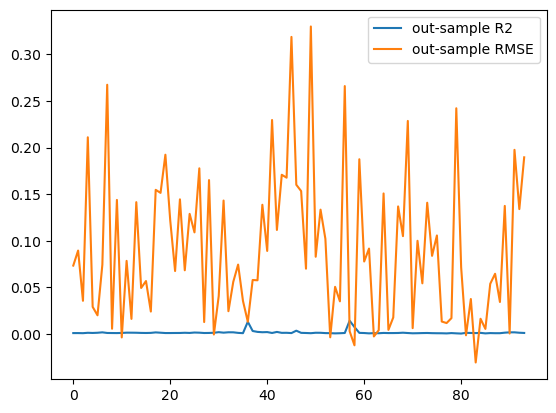

out-sample R2:  0.001610055754388722
out-sample RMSE:  0.09149026270355563


In [20]:
# use lightGBM to fit the model using sklearn
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

all_r2_in = []
all_r2_out = []
all_rmse_in = []
all_rmse_out = []

start_date = pd.to_datetime('2020-07-02 09:05:00')

while start_date <= data.index[-1]:
    train_date = valid_date_n_days_later(start_date, data, 3)
    if train_date > data.index[-1]:
        break
    test_date = valid_date_n_days_later(train_date, data, 1)
    end_date = valid_date_n_days_later(test_date, data, 1)


    train_data = data.loc[start_date:train_date]
    train_data = train_data[:-1]
    test_data = data.loc[test_date:end_date]
    test_data = test_data[:-1]

    X_train = train_data[list]
    y_train = train_data['delta_1']

    X_test = test_data[list]
    y_test = test_data['delta_1']

    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # specify your configurations as a dict
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'mse', 'mae'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
    }

    print('Starting training...')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=100,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=5)

    print('Saving model...')
    # save model to file
    gbm.save_model('model.txt')

    print('Starting predicting...')
    # predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

    r2_in =  regr.score(X_train, y_train)
    r2_out = regr.score(X_test, y_test)
    rmse_in =  np.sqrt(np.mean((regr.predict(X_train) - y_train) ** 2))
    rmse_out = np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2))

    # add the result to the list
    all_r2_out.append(mean_squared_error(y_test, y_pred) ** 0.5)
    all_rmse_out.append(r2_score(y_test, y_pred))

    start_date = end_date

# plot the 4 lists in the same plot
plt.plot(all_r2_out, label='out-sample R2')
plt.plot(all_rmse_out, label='out-sample RMSE')
plt.legend()
plt.show()

# print R2
print("out-sample R2: ", sum(all_r2_out)/len(all_r2_out))
print("out-sample RMSE: ", sum(all_rmse_out)/len(all_rmse_out))
# use the data above to fit the model

In [14]:
# use the